First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species  

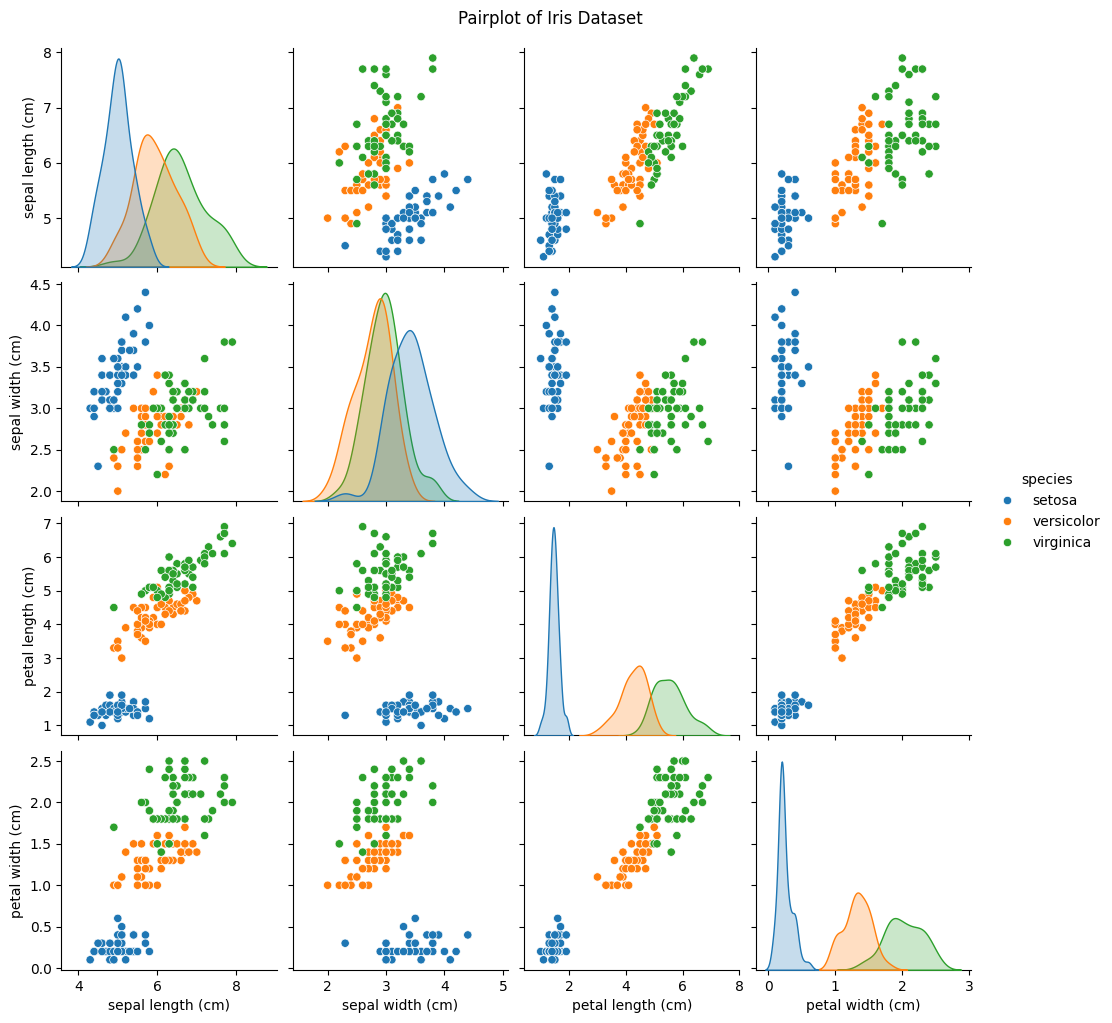

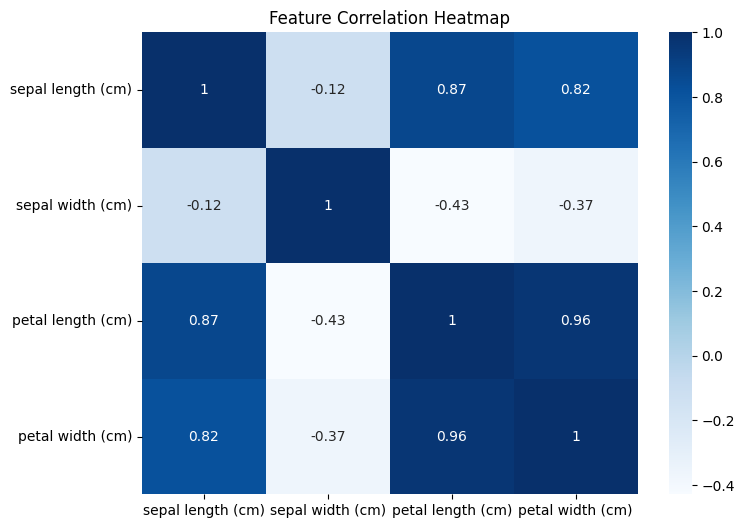


Average petal length by species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64


C:\Users\Charan Kumar\AppData\Local\Temp\ipykernel_17476\1295573471.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='sepal width (cm)', data=iris_df, palette="Set2")


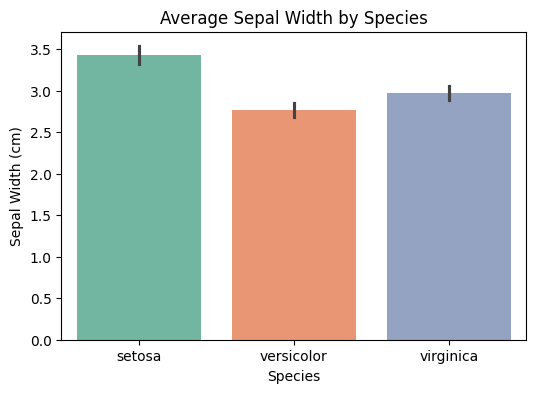


Training samples: 120
Testing samples: 30

Model accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



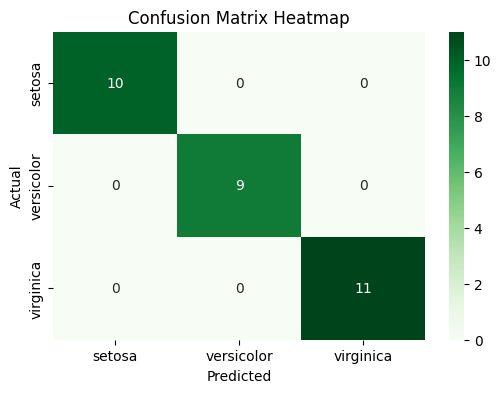

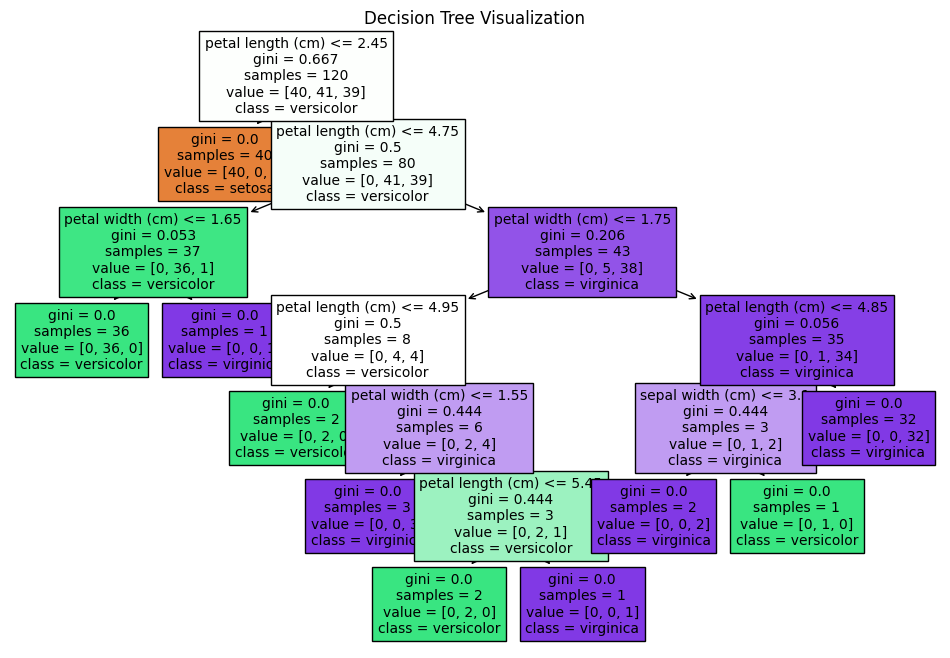

In [4]:
# Iris Flower Classification
# Internship Project - Cloudcredits Technologies

# ---------------------------
# 1. Import libraries
# ---------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# 2. Load and inspect the dataset
# ---------------------------
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First five rows of the dataset:")
print(iris_df.head())

# ---------------------------
# 3. Explore the data
# ---------------------------
print("\nDataset info:")
print(iris_df.info())

print("\nSummary statistics:")
print(iris_df.describe())

print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())

# Visualize feature relationships
sns.pairplot(iris_df, hue="species")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.iloc[:, :-1].corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

# Additional analysis: average petal length by species
print("\nAverage petal length by species:")
print(iris_df.groupby('species')['petal length (cm)'].mean())

# Bar plot of average sepal width by species
plt.figure(figsize=(6, 4))
sns.barplot(x='species', y='sepal width (cm)', data=iris_df, palette="Set2")
plt.title("Average Sepal Width by Species")
plt.ylabel("Sepal Width (cm)")
plt.xlabel("Species")
plt.show()

# ---------------------------
# 4. Split the data
# ---------------------------
X = iris_df.iloc[:, :-1]  # Features
y = iris_df['species']    # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# ---------------------------
# 5. Train the model
# ---------------------------
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# 6. Make predictions
# ---------------------------
predictions = model.predict(X_test)

# ---------------------------
# 7. Evaluate the model
# ---------------------------
print("\nModel accuracy:", round(accuracy_score(y_test, predictions), 2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ---------------------------
# 8. Visualize the decision tree
# ---------------------------
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
